# Time Series Analysis and Prediction

Time Series Analysis carries methods to research time-series <b>Statistics</b> to extract statistical features from the data. Time Series Forecasting is used in training a <b>Machine Learning Model</b> to predict future values with the usuage of historical importance.

Time Series Analysis is broadly speaking used in training machine learning models for the Economy, weather forecasting, stock prediction and additionally in sales forecasting.

It can be said that Time Series Analysis is widely used in facts based on non-stationary features.

Using different methods for sales forecasting using the time series analysis with python.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
from pylab import rcParams 

In [2]:
plt.style.use("fivethirtyeight")
matplotlib.rcParams["axes.labelsize"]= 14
matplotlib.rcParams["xtick.labelsize"]= 12
matplotlib.rcParams["ytick.labelsize"]= 12
matplotlib.rcParams["text.color"]= 'k'

There are different categories in the dataset. let's start from time series analysis and sales forecasting of furniture.

In [3]:
data= pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')
furniture= data.loc[data["Category"]== "Furniture"]
furniture["Order Date"] = pd.to_datetime(furniture["Order Date"], errors='coerce')
furniture["Order Date"].min(), furniture["Order Date"].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Data Pre-Processing

Data preprocessing includes removing columns that we don't need, looking for missing values. etc.

In [5]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
columns = ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
           'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 
           'State', 'Postal Code', 'Region', 'Product ID', 'Category', 
           'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 
           'Profit']

#furniture.drop(columns, axis=1, inplace=True)
furniture= furniture.sort_values("Order Date")
furniture.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Indexing Time Series Data

In [8]:
furniture= furniture.set_index("Order Date")
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-28', '2017-12-28', '2017-12-28', '2017-12-29',
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

The current DateTime looks a little challenging to work within the dataset, so i will use the price of each data sales on average of the month for maintaining it simple. Here using the start of each month as a timestamp

In [9]:
y= furniture["Sales"].resample("MS").mean()

In [10]:
print(y)

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014438
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

#### Visualizing the furniture sales data

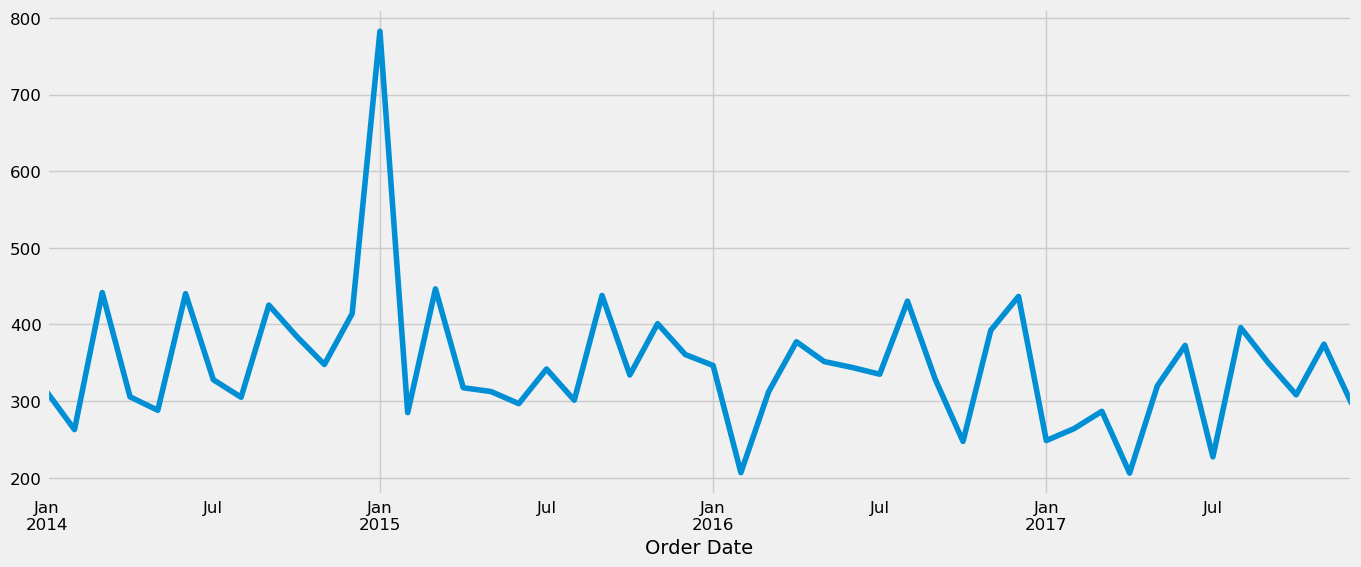

In [11]:
y.plot(figsize=(15,6))
plt.show()

Some patterns can be drawn from the above figure, the time series is patterned seasonally like sales are low at the beginnning of every year and sales increases at the end of the year.

Now let's visualize this data using the time series decomposition method which will allow our time series to decompose into three components:

1. Trend
2. Season
3. Noise

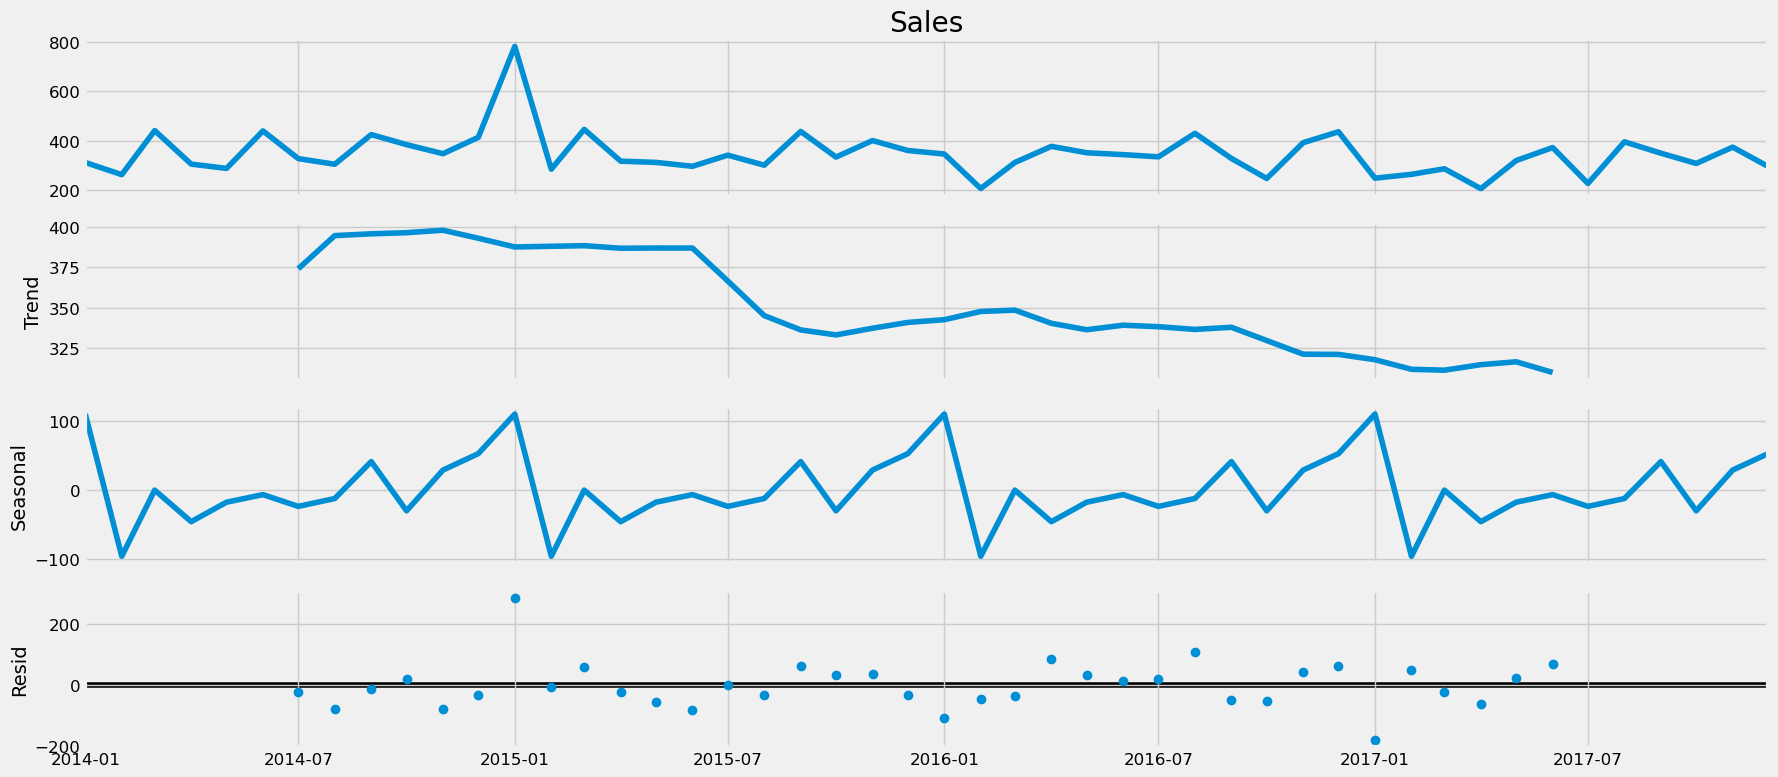

In [13]:
rcParams["figure.figsize"]= 18, 8
decomposition= sm.tsa.seasonal_decompose(y, model="additive")
fig= decomposition.plot()
plt.show()

The above figure show that the sales of furniture is not stable because of the seasons.

### Time Series Forecasting with ARIMA


ARIMA is one of the most used methods in time series forecasting. ARIMA stands for Autoregressive Integrated Moving Average. Now i will use the ARIMA methos in the further process of time series forecasting.

In [15]:
p=d=q=range(0,2)
pdq= list(itertools.product(p, d, q))
seasonal_pdq= [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print("Examples of parameter combinations for Seasonal ARIMA....")
print("SARIMAX: {} x {}".format(pdq[1], seasonal_pdq[1]))
print("SARIMAX: {} x {}".format(pdq[1], seasonal_pdq[2]))
print("SARIMAX: {} x {}".format(pdq[2], seasonal_pdq[3]))
print("SARIMAX: {} x {}".format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA....
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


The step is the process of selection of parameters in our Time Series Forecasting model for furniture sales:

In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Create the SARIMAX model
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, 
                                             enforce_stationarity=False, enforce_invertibility=False)
            # Fit the model
            results = mod.fit()

            # Print the AIC value for the current model
            print("ARIMA{}x{}12 - AIC: {}".format(param, param_seasonal, results.aic))

            # Check if the current model is better than the best found so far
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = param_seasonal

        except Exception as e:
            print(f"Error fitting ARIMA{param}x{param_seasonal}: {e}")
            continue

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14908D+00    |proj g|=  1.38968D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      2      1     0     0   1.417D-06   7.149D+00
  F =   7.1490754343663800     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC: 688.3112416991725
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  1.61999D+01    |proj g|=  2.94079D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6    120      3     2     0   2.941D+04   1.620D+01
  F =   16.199929665215706     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC: 1559.1932478607077
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42255D+00    |proj g|=  8.93759D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   1.200D-06   4.419D+00
  F =   4.4187984269366369     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC: 426.2046489859171
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =  

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.38798D+00    |proj g|=  1.31201D-02

At iterate    5    f=  4.38758D+00    |proj g|=  2.16796D-02

At iterate   10    f=  4.36095D+00    |proj g|=  3.12029D-01

At iterate   15    f=  4.32483D+00    |proj g|=  1.40735D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   3.482D-06   4.325D+00
  F =   4.3247459479722439     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0,

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC: 295.44645647223496
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85965D+00    |proj g|=  2.18433D-03

At iterate    5    f=  2.79492D+00    |proj g|=  2.67297D-02

At iterate   10    f=  2.79262D+00    |proj g|=  2.18293D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   2.814D-06   2.793D+00
  F =   2.7926248392008426     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0

 This problem is unconstrained.


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC: 641.124068066593
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86966D+01    |proj g|=  1.91155D-03
  ys=-2.786E+04  -gs= 5.736E-03 BFGS update SKIPPED


 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     31      2     1     0   8.491D+04   2.784D+01
  F =   27.836839061822914     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC: 2678.3365499349998
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.29803D+00    |proj g|=  2.64872D-03

At iterate    5    f=  4.29801D+00    |proj g|=  3.33601D-03

At iterate   10    f=  4.29747D+00    |proj g|=  1.04005D-02

           *

 This problem is unconstrained.



At iterate    5    f=  2.69955D+00    |proj g|=  4.96601D-03

At iterate   10    f=  2.68938D+00    |proj g|=  7.95498D-02

At iterate   15    f=  2.67212D+00    |proj g|=  1.65662D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     21      1     0     0   1.064D-06   2.672D+00
  F =   2.6721151219246906     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC: 262.5230517047703
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  5.14515D+00    |proj g|=  4.08446D-03

At iterate   10    f=  5.10951D+00    |proj g|=  9.05089D-02

At iterate   15    f=  4.84616D+00    |proj g|=  2.16477D-01

At iterate   20    f=  4.75554D+00    |proj g|=  1.21483D-01

At iterate   25    f=  4.71307D+00    |proj g|=  9.05922D-02

At iterate   30    f=  4.69305D+00    |proj g|=  2.98719D-02

At iterate   35    f=  4.68489D+00    |proj g|=  2.25419D-02

At iterate   40    f=  4.68182D+00    |proj g|=  4.03501D-03

At iterate   45    f=  4.67971D+00    |proj g|=  4.80490D-03

At iterate   50    f=  4.67857D+00    |proj g|=  8.58589D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC: 455.14227548695493
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.84279D+00    |proj g|=  1.59709D-02

At iterate    5    f=  4.84149D+00    |proj g|=  3.26178D-03

At iterate   10    f=  4.82287D+00    |proj g|=  8.36658D-02

At iterate   15    f=  4.37834D+00    |proj g|=  4.52686D-01

At iterate   20    f=  4.24568D+00    |proj g|=  6.28882D-02

At iterate   25    f=  4.21623D+00    |proj g|=  6.76524D-02

At iterate   30    f=  4.20862D+00    |proj g|=  1.08765D-02

At iterate   35    f=  4.20551D+00    |proj g|=  1.63707D-02

At iterate   40    f=  4.20466D+00    |proj g|=  7.77466D-03

At iterate   45    f=  4.20414D+00    |proj g|=  7.29134D-03


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  4.20393D+00    |proj g|=  7.58009D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     70      1     0     0   7.580D-03   4.204D+00
  F =   4.2039253323833359     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC: 411.5768319088003
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03931D+00    |proj g|=  4.97437D-02

At iterate    5    f=  3.03621D+00    |proj g|=  3.13526D-04

At iterate   

 This problem is unconstrained.



At iterate   10    f=  2.69353D+00    |proj g|=  6.58294D-02

At iterate   15    f=  2.67258D+00    |proj g|=  1.31171D-02

At iterate   20    f=  2.67211D+00    |proj g|=  4.16376D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     27      1     0     0   2.900D-07   2.672D+00
  F =   2.6721145970084792     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC: 264.523001312814
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  6.52214D+00    |proj g|=  3.14420D-02

At iterate   15    f=  6.41262D+00    |proj g|=  4.43582D-01

At iterate   20    f=  6.28849D+00    |proj g|=  3.46316D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     32      1     0     0   3.592D-06   6.288D+00
  F =   6.2881181816352099     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC: 609.6593454369802
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     29      2     1     0   8.573D+04   2.613D+01
  F =   26.133272373682786     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC: 2516.7941478735474
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.18281D+00    |proj g|=  9.61874D-03

At iterate    5    f=  4.18270D+00    |proj g|=  2.69620D-03

At iterate   10    f=  4.18169D+00    |proj g|=  2.00976D-02

At iterate  

 This problem is unconstrained.



At iterate    5    f=  2.56579D+00    |proj g|=  2.09262D-03

At iterate   10    f=  2.55889D+00    |proj g|=  7.89635D-02

At iterate   15    f=  2.51625D+00    |proj g|=  1.22637D-02

At iterate   20    f=  2.51604D+00    |proj g|=  6.27336D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     28      1     0     0   5.231D-06   2.516D+00
  F =   2.5160396309616671     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC: 249.53980457232004
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At 

 This problem is unconstrained.



At iterate   15    f=  4.89869D+00    |proj g|=  3.57248D-01

At iterate   20    f=  4.74212D+00    |proj g|=  1.53291D-01

At iterate   25    f=  4.69971D+00    |proj g|=  9.39873D-02

At iterate   30    f=  4.68018D+00    |proj g|=  1.74520D-02

At iterate   35    f=  4.67532D+00    |proj g|=  4.34116D-02

At iterate   40    f=  4.67236D+00    |proj g|=  4.06698D-02

At iterate   45    f=  4.67145D+00    |proj g|=  5.60052D-03

At iterate   50    f=  4.67098D+00    |proj g|=  4.98225D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     70      1     0     0   4.982D-03   4.671D+00
  F =   4.67097818717

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f=  4.70063D+00    |proj g|=  2.67147D-03

At iterate   10    f=  4.69954D+00    |proj g|=  6.50014D-03

At iterate   15    f=  4.65500D+00    |proj g|=  1.04967D-01

At iterate   20    f=  4.12625D+00    |proj g|=  3.00896D-01

At iterate   25    f=  4.08695D+00    |proj g|=  2.34703D-02

At iterate   30    f=  4.08305D+00    |proj g|=  3.93632D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   2.551D-06   4.083D+00
  F =   4.0830298588687555     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC: 401.970866451

 This problem is unconstrained.



At iterate    5    f=  3.03732D+00    |proj g|=  5.10158D-04

At iterate   10    f=  3.03708D+00    |proj g|=  6.19498D-03

At iterate   15    f=  3.03558D+00    |proj g|=  1.95414D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   4.449D-06   3.036D+00
  F =   3.0355757487037955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC: 299.4152718755644
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  2.56578D+00    |proj g|=  6.32280D-03

At iterate   10    f=  2.56547D+00    |proj g|=  6.37649D-03

At iterate   15    f=  2.54901D+00    |proj g|=  8.28690D-02

At iterate   20    f=  2.51513D+00    |proj g|=  8.55551D-03

At iterate   25    f=  2.51466D+00    |proj g|=  8.57852D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   3.085D-06   2.515D+00
  F =   2.5146562958270473     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC: 251.40700439939653
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.02787D+00    |proj g|=  3.01647D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   8.346D-06   6.027D+00
  F =   6.0274888225803176     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC: 580.6389269677105
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67035D+01    |proj g|=  7.82220D-03
  ys=-1.158E+02  -gs= 7

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC: 1646.7905965641744
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49425D+00    |proj g|=  4.04945D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      4      1     0     0   1.772D-06   4.493D+00
  F =   4.4932834757339624     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC: 433.3552136704604
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =  

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-3.908E+01  -gs= 6.959E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     77      4     2     0   8.551D+02   1.474D+01
  F =   14.741318058462761     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC: 1421.1665336124252
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02204D+00    |proj g|=  4.07923D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explo

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85450D+00    |proj g|=  6.11576D-02

At iterate    5    f=  2.84885D+00    |proj g|=  1.37693D-03

At iterate   10    f=  2.84790D+00    |proj g|=  3.22812D-02

At iterate   15    f=  2.81543D+00    |proj g|=  1.95086D-02

At iterate   20    f=  2.81360D+00    |proj g|=  1.18203D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     25      1     0     0   1.182D-06   2.814D+00
  F =   2.8135972022567102     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL    

 This problem is unconstrained.


ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC: 538.8964721447218
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59822D+01    |proj g|=  6.89306D-03


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  2.59627D+01    |proj g|=  2.38249D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f=  2.59627D+01    |proj g|=  1.07452D-01
  ys=-3.296E-08  -gs= 1.251E-08 BFGS update SKIPPED
  ys=-8.213E-09  -gs= 1.248E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14    109      3     2     0   3.712D-02   2.596D+01
  F =   25.962698807811289     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC: 2498.4190855498837
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.26029D+

 This problem is unconstrained.



At iterate    5    f=  4.25934D+00    |proj g|=  7.86065D-03

At iterate   10    f=  4.25909D+00    |proj g|=  3.30500D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     15      1     0     0   3.305D-06   4.259D+00
  F =   4.2590906144847507     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC: 412.8726989905361
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64822D+00    |proj g|=  7.99254D-02


 This problem is unconstrained.



At iterate    5    f=  2.60742D+00    |proj g|=  1.93071D-03

At iterate   10    f=  2.60247D+00    |proj g|=  5.82957D-02

At iterate   15    f=  2.55673D+00    |proj g|=  4.24045D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     28      1     0     0   3.790D-06   2.555D+00
  F =   2.5546570578212053     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC: 251.2470775508357
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   10    f=  4.31289D+00    |proj g|=  3.79318D-02

At iterate   15    f=  4.30416D+00    |proj g|=  1.26492D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     24      1     0     0   5.003D-06   4.304D+00
  F =   4.3039997840884672     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC: 419.1839792724928


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58629D+01    |proj g|=  6.89306D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  2.50480D+01    |proj g|=  7.92145D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7    120      3     0     0   8.047D+04   2.504D+01
  F =   25.042116886089403     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC: 2412.0432210645827
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89427D+00    |proj g|=  9.19271D-02

At iterate    5    f=  2.84907D+00    |proj g|=  2.36546D-02

At iterate   10    f=  2.84903D+00    |proj g|=  5.20963D-03

At iterate  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64822D+00    |proj g|=  7.99254D-02

At iterate    5    f=  2.60729D+00    |proj g|=  1.33889D-02

At iterate   10    f=  2.60715D+00    |proj g|=  2.66564D-03

At iterate   15    f=  2.60707D+00    |proj g|=  6.54873D-02

At iterate   20    f=  2.59953D+00    |proj g|=  4.76451D-01

At iterate   25    f=  2.55585D+00    |proj g|=  3.39951D-02

At iterate   30    f=  2.55445D+00    |proj g|=  9.11819D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  5.46393D+00    |proj g|=  3.15689D-02

At iterate   15    f=  5.45351D+00    |proj g|=  1.54449D-01

At iterate   20    f=  5.45165D+00    |proj g|=  3.50422D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   4.775D-06   5.452D+00
  F =   5.4516461153392415     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC: 529.3580270725672


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52207D+01    |proj g|=  6.43190D-03
  ys=-2.205E+07  -gs= 1.382E-01 BFGS update SKIPPED


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     30      2     1     0   1.229D+06   1.354D+01
  F =   13.537692434194723     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC: 1307.6184736826933
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.13452D+00    |proj g|=  5.55249D-02

At iterate    5    f=  4.13117D+00    |proj g|=  1.94515D-03

At iterate   10    f=  4.12951D+00    |proj g|=  2.61901D-02

At iterate  

 This problem is unconstrained.



At iterate    5    f=  2.49334D+00    |proj g|=  7.94257D-03

At iterate   10    f=  2.49184D+00    |proj g|=  1.01972D-02

At iterate   15    f=  2.43905D+00    |proj g|=  5.12966D-02

At iterate   20    f=  2.42714D+00    |proj g|=  3.18803D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     29      1     0     0   1.698D-06   2.427D+00
  F =   2.4271380435416643     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC: 241.0052521799998
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X

 This problem is unconstrained.



At iterate   10    f=  4.31996D+00    |proj g|=  1.42818D-02

At iterate   15    f=  4.30746D+00    |proj g|=  7.59818D-02

At iterate   20    f=  4.30349D+00    |proj g|=  9.37524D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     27      1     0     0   5.905D-07   4.303D+00
  F =   4.3034933698008233     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC: 421.13536350087907
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.


  ys=-2.537E+06  -gs= 1.793E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     55      2     1     0   8.527D+04   2.472D+01
  F =   24.723168958798016     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC: 2383.4242200446097
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90408D+00    |proj g|=  9.38559D-02

At iterate    5    f=  2.86452D+00    |proj g|=  3.63074D-02

At iterate   10    f=  2.86329D+00    |proj g|=  2.30464D-03

At iterate  

 This problem is unconstrained.



At iterate   10    f=  2.49271D+00    |proj g|=  1.27839D-02

At iterate   15    f=  2.49256D+00    |proj g|=  2.03861D-02

At iterate   20    f=  2.47819D+00    |proj g|=  8.36911D-02

At iterate   25    f=  2.46082D+00    |proj g|=  3.39497D-02

At iterate   30    f=  2.45779D+00    |proj g|=  1.90824D-01

At iterate   35    f=  2.42917D+00    |proj g|=  4.45564D-01

At iterate   40    f=  2.42691D+00    |proj g|=  4.60792D-02

At iterate   45    f=  2.42687D+00    |proj g|=  8.56605D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     68      1     0     0   8.566D-05   2.427D+00
  F =   2.42687018295

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-2.283E+01  -gs= 7.073E-01 BFGS update SKIPPED
  ys=-1.087E+02  -gs= 7.228E-01 BFGS update SKIPPED

At iterate    5    f=  1.41122D+01    |proj g|=  2.73802D+05
  ys=-2.189E-01  -gs= 2.576E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6    103      2     3     0   2.738D+05   1.411D+01
  F =   14.112230453382097     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC: 1360.7741235246813
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41379D+00    |proj g|=  5.67857D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explo

 This problem is unconstrained.



At iterate   15    f=  4.38370D+00    |proj g|=  1.34127D-01

At iterate   20    f=  4.32509D+00    |proj g|=  4.04783D-01

At iterate   25    f=  4.31679D+00    |proj g|=  2.83915D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     32      1     0     0   1.044D-06   4.317D+00
  F =   4.3167859781167088     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC: 420.41145389920405
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.



At iterate   10    f=  4.38558D+00    |proj g|=  1.38664D-02

At iterate   15    f=  4.38532D+00    |proj g|=  1.48229D-02

At iterate   20    f=  4.35906D+00    |proj g|=  2.06488D-01

At iterate   25    f=  4.31562D+00    |proj g|=  9.75236D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     34      1     0     0   4.493D-06   4.316D+00
  F =   4.3155438179105206     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC: 422.29220651940994
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At 

 This problem is unconstrained.



At iterate   10    f=  2.79191D+00    |proj g|=  5.72343D-02

At iterate   15    f=  2.78733D+00    |proj g|=  1.52376D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   3.242D-07   2.787D+00
  F =   2.7873337453811797     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC: 273.58403955659327
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81055D+00    |proj g|=  1.56131D-02


 This problem is unconstrained.



At iterate    5    f=  2.81021D+00    |proj g|=  4.98248D-03

At iterate   10    f=  2.80647D+00    |proj g|=  4.59061D-02

At iterate   15    f=  2.78766D+00    |proj g|=  1.57871D-02

At iterate   20    f=  2.78728D+00    |proj g|=  2.87989D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     24      1     0     0   3.677D-06   2.787D+00
  F =   2.7872753166263688     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC: 275.5784303961314
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     31      1     0     0   1.795D-03   5.701D+00
  F =   5.7007493935461797     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC: 553.2719417804333
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77868D+01    |proj g|=  7.18936D-03
  ys=-7.688E+05  -gs= 3.515E-02 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     27      2     1     0   1.639D+05   2.529D+01
  F =   25.287737953589680     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC: 2435.622843544609
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.29778D+00    |proj g|=  3.85493D-04

At iterate    5    f=  4.29771D+00    |proj g|=  7.03709D-03

At iterate   10    f=  4.29731D+00    |proj g|=  5.67755D-03

At iterate   

 This problem is unconstrained.



At iterate    5    f=  2.69950D+00    |proj g|=  5.45939D-03

At iterate   10    f=  2.69087D+00    |proj g|=  7.88641D-02

At iterate   15    f=  2.68564D+00    |proj g|=  3.99150D-02

At iterate   20    f=  2.68428D+00    |proj g|=  1.01099D-01

At iterate   25    f=  2.66607D+00    |proj g|=  1.30367D-01

At iterate   30    f=  2.66481D+00    |proj g|=  7.59786D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     44      1     0     0   1.260D-05   2.665D+00
  F =   2.6648091428265048     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC: 263.821677711

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.64553D+00    |proj g|=  1.00567D+00

At iterate    5    f=  4.34040D+00    |proj g|=  2.04117D-01

At iterate   10    f=  4.32270D+00    |proj g|=  8.17112D-02

At iterate   15    f=  4.32161D+00    |proj g|=  1.15748D-03

At iterate   20    f=  4.32151D+00    |proj g|=  2.70775D-02

At iterate   25    f=  4.31744D+00    |proj g|=  1.18406D-01

At iterate   30    f=  4.31667D+00    |proj g|=  1.41728D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  4.06893D+00    |proj g|=  2.04182D-01

At iterate   15    f=  4.06262D+00    |proj g|=  3.85617D-02

At iterate   20    f=  4.06210D+00    |proj g|=  2.60852D-02

At iterate   25    f=  4.06117D+00    |proj g|=  5.43642D-01

At iterate   30    f=  4.01178D+00    |proj g|=  6.87724D-01

At iterate   35    f=  3.94823D+00    |proj g|=  1.21746D-01

At iterate   40    f=  3.94314D+00    |proj g|=  4.67840D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     52      1     0     0   9.583D-04   3.943D+00
  F =   3.9431393519622997     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.81807D+00    |proj g|=  7.58928D-03

At iterate   10    f=  2.81693D+00    |proj g|=  1.54747D-02

At iterate   15    f=  2.79497D+00    |proj g|=  1.02047D-01

At iterate   20    f=  2.78622D+00    |proj g|=  4.56415D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   6.410D-06   2.786D+00
  F =   2.7862247297196645     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC: 275.4775740530878
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  2.69947D+00    |proj g|=  5.86199D-03

At iterate   10    f=  2.69417D+00    |proj g|=  3.59540D-02

At iterate   15    f=  2.68627D+00    |proj g|=  4.44142D-02

At iterate   20    f=  2.68488D+00    |proj g|=  2.14905D-02

At iterate   25    f=  2.67022D+00    |proj g|=  1.00542D-01

At iterate   30    f=  2.66481D+00    |proj g|=  1.38871D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     44      1     0     0   2.473D-05   2.665D+00
  F =   2.6648042769494604     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC: 265.821210587

 This problem is unconstrained.



At iterate   10    f=  5.57692D+00    |proj g|=  3.40637D-02

At iterate   15    f=  5.57642D+00    |proj g|=  1.01102D+00

At iterate   20    f=  5.57464D+00    |proj g|=  1.70279D-02

At iterate   25    f=  5.57463D+00    |proj g|=  2.03136D-02

At iterate   30    f=  5.57387D+00    |proj g|=  3.86246D-01

At iterate   35    f=  5.56099D+00    |proj g|=  1.21392D-01

At iterate   40    f=  5.55337D+00    |proj g|=  4.30336D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     50      1     0     0   3.417D-03   5.553D+00
  F =   5.5533699160764920     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.354E+00  -gs= 1.968E+00 BFGS update SKIPPED

At iterate    5    f=  1.63571D+01    |proj g|=  1.09498D+06
  ys=-2.359E+06  -gs= 1.748E+03 BFGS update SKIPPED


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     83      4     2     0   1.095D+06   1.636D+01
  F =   16.357059710800645     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC: 1580.2777322368618
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.51509D+00    |proj g|=  4.51555D-01

At iterate    5    f=  4.22707D+00    |proj g|=  2.20370D-01

At iterate   10    f=  4.21280D+00    |proj g|=  1.37463D-02

At iterate  

 This problem is unconstrained.



At iterate    5    f=  2.57465D+00    |proj g|=  2.35267D-02

At iterate   10    f=  2.57199D+00    |proj g|=  9.06927D-03

At iterate   15    f=  2.57055D+00    |proj g|=  4.51079D-02

At iterate   20    f=  2.56755D+00    |proj g|=  2.04749D-03

At iterate   25    f=  2.56659D+00    |proj g|=  6.78051D-02

At iterate   30    f=  2.54184D+00    |proj g|=  2.88423D-01

At iterate   35    f=  2.53001D+00    |proj g|=  1.12626D-02

At iterate   40    f=  2.52887D+00    |proj g|=  9.13317D-02

At iterate   45    f=  2.52723D+00    |proj g|=  2.59277D-02


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  2.52658D+00    |proj g|=  3.34132D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     67      1     0     0   3.341D-03   2.527D+00
  F =   2.5265772263553985     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC: 252.55141373011827
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.63760D+00    |proj g|=  9.27296D-01

At iterate    5    f=  4.34006D+00    |proj g|=  7.66285D-02

At iterate  

 This problem is unconstrained.



At iterate    5    f=  3.97250D+00    |proj g|=  1.20954D+00

At iterate   10    f=  3.96269D+00    |proj g|=  2.51137D-02

At iterate   15    f=  3.96151D+00    |proj g|=  3.09686D-02

At iterate   20    f=  3.96132D+00    |proj g|=  6.17527D-02

At iterate   25    f=  3.96108D+00    |proj g|=  5.42200D-03

At iterate   30    f=  3.95430D+00    |proj g|=  1.08990D+00

At iterate   35    f=  3.88304D+00    |proj g|=  1.29272D+00

At iterate   40    f=  3.84930D+00    |proj g|=  1.16677D+00

At iterate   45    f=  3.83481D+00    |proj g|=  9.48961D-01


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  3.83438D+00    |proj g|=  4.27933D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     79      1     0     0   4.279D-04   3.834D+00
  F =   3.8343778589189284     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC: 380.1002744562171
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13886D+00    |proj g|=  3.23290D-01

At iterate    5    f=  2.84568D+00    |proj g|=  2.06712D-01

At iterate   

 This problem is unconstrained.



At iterate    5    f=  2.57810D+00    |proj g|=  2.75653D-02

At iterate   10    f=  2.57218D+00    |proj g|=  5.83899D-03

At iterate   15    f=  2.56892D+00    |proj g|=  5.54250D-02

At iterate   20    f=  2.56805D+00    |proj g|=  1.73742D-02

At iterate   25    f=  2.56463D+00    |proj g|=  1.26781D-02

At iterate   30    f=  2.56452D+00    |proj g|=  2.20630D-03

At iterate   35    f=  2.56426D+00    |proj g|=  5.30980D-02

At iterate   40    f=  2.54463D+00    |proj g|=  3.15590D-01

At iterate   45    f=  2.51048D+00    |proj g|=  9.12064D-02

At iterate   50    f=  2.50373D+00    |proj g|=  2.97194D-02


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   2.972D-02   2.504D+00
  F =   2.5037328136605534     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC: 252.35835011141313
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85960D+00    |proj g|=  6.77058D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explo


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     81      4     2     0   1.850D+05   1.346D+01
  F =   13.458861602577352     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC: 1298.0507138474259
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.44094D+00    |proj g|=  5.29239D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explo

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.14940D+00    |proj g|=  6.24557D-03

At iterate   10    f=  4.13076D+00    |proj g|=  1.27238D-01

At iterate   15    f=  4.07674D+00    |proj g|=  2.82178D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     21      1     0     0   1.267D-06   4.077D+00
  F =   4.0767385225536934     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC: 397.36689816515457
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     80      4     2     0   3.798D+04   1.453D+01
  F =   14.530532467550735     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC: 1402.9311168848706
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80830D+00    |proj g|=  9.03413D-02

At iterate    5    f=  2.80060D+00    |proj g|=  3.15530D-03

At iterate   10    f=  2.79100D+00    |proj g|=  5.20337D-02


 This problem is unconstrained.



At iterate   15    f=  2.78585D+00    |proj g|=  1.12617D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   2.026D-07   2.786D+00
  F =   2.7858493737426318     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC: 273.44153987929263
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80104D+00    |proj g|=  1.79991D-02

At iterate    5    f=  2.80047D+00    |proj g|=  1.25475D-03


 This problem is unconstrained.



At iterate   10    f=  2.79924D+00    |proj g|=  2.58965D-02

At iterate   15    f=  2.78569D+00    |proj g|=  1.24569D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   1.091D-05   2.786D+00
  F =   2.7855498518228736     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC: 275.4127857749959
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59120D+00    |proj g|=  1.54417D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     58      2     0     0   8.183D+04   2.513D+01
  F =   25.128372127533410     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC: 2420.3237242432074
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25876D+00    |proj g|=  1.81732D-02

At iterate    5    f=  4.25843D+00    |proj g|=  8.16493D-04

At iterate   10    f=  4.25808D+00    |proj g|=  2.80193D-03

           *

  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC: 414.77261730426864
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.63844D+00    |proj g|=  1.17841D-01

At iterate    5    f=  2.60460D+00    |proj g|=  1.77486D-02


 This problem is unconstrained.



At iterate   10    f=  2.60203D+00    |proj g|=  8.01649D-02

At iterate   15    f=  2.55871D+00    |proj g|=  3.03158D-01

At iterate   20    f=  2.54856D+00    |proj g|=  9.63636D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     28      1     0     0   1.957D-05   2.549D+00
  F =   2.5485556591117500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC: 252.66134327472798
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.



At iterate   10    f=  4.09399D+00    |proj g|=  8.81834D-02

At iterate   15    f=  4.09010D+00    |proj g|=  8.24307D-03

At iterate   20    f=  4.06627D+00    |proj g|=  1.11140D-01

At iterate   25    f=  3.99900D+00    |proj g|=  4.47433D-02

At iterate   30    f=  3.99823D+00    |proj g|=  1.15151D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     40      1     0     0   1.152D-05   3.998D+00
  F =   3.9982325580523530     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC: 391.8303255730259
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     29      2     1     0   8.021D+05   1.717D+01
  F =   17.172402210777005     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC: 1658.5506122345923
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76517D+00    |proj g|=  1.28280D-01

At iterate    5    f=  2.73477D+00    |proj g|=  8.16494D-01

At iterate   10    f=  2.72605D+00    |proj g|=  4.33479D-02

At iterate  

 This problem is unconstrained.



At iterate    5    f=  2.60848D+00    |proj g|=  3.52359D-02

At iterate   10    f=  2.60397D+00    |proj g|=  4.80873D-03

At iterate   15    f=  2.60395D+00    |proj g|=  3.32942D-02

At iterate   20    f=  2.60226D+00    |proj g|=  4.27075D-01

At iterate   25    f=  2.56296D+00    |proj g|=  8.88815D-01

At iterate   30    f=  2.54892D+00    |proj g|=  5.69462D-01

At iterate   35    f=  2.54835D+00    |proj g|=  3.60214D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     46      1     0     0   2.581D-06   2.548D+00
  F =   2.5483549095893108     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  5.46175D+00    |proj g|=  1.83074D-03

At iterate   15    f=  5.46092D+00    |proj g|=  3.21946D-02

At iterate   20    f=  5.45122D+00    |proj g|=  2.82161D-02

At iterate   25    f=  5.45053D+00    |proj g|=  9.60613D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     30      1     0     0   2.087D-06   5.451D+00
  F =   5.4505288968944354     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC: 531.2507741018658
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     62      2     0     0   1.416D+02   2.516D+01
  F =   25.164497946176851     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC: 2425.7918028329777
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.27699D+00    |proj g|=  4.93043D-01

At iterate    5    f=  4.14875D+00    |proj g|=  3.01239D-02

At iterate   10    f=  4.14679D+00    |proj g|=  1.89877D-03

At iterate  

 This problem is unconstrained.



At iterate    5    f=  2.49743D+00    |proj g|=  3.31639D-02

At iterate   10    f=  2.47975D+00    |proj g|=  1.61205D-02

At iterate   15    f=  2.47933D+00    |proj g|=  3.67015D-03

At iterate   20    f=  2.47781D+00    |proj g|=  2.68448D-02

At iterate   25    f=  2.42345D+00    |proj g|=  8.33475D-02

At iterate   30    f=  2.42158D+00    |proj g|=  3.01770D-02

At iterate   35    f=  2.41908D+00    |proj g|=  1.89176D-02

At iterate   40    f=  2.41888D+00    |proj g|=  1.01135D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     66      1     0     0   1.115D-05   2.419D+00
  F =   2.41888313882

 This problem is unconstrained.



At iterate    5    f=  4.11882D+00    |proj g|=  3.26690D-03

At iterate   10    f=  4.11659D+00    |proj g|=  6.93466D-02

At iterate   15    f=  4.11090D+00    |proj g|=  9.47292D-03

At iterate   20    f=  4.09908D+00    |proj g|=  5.29071D-02

At iterate   25    f=  4.05029D+00    |proj g|=  4.02620D-02

At iterate   30    f=  4.04868D+00    |proj g|=  1.46948D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     41      1     0     0   1.043D-06   4.049D+00
  F =   4.0486807684434840     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC: 398.673353770

 This problem is unconstrained.


  ys=-4.809E+06  -gs= 1.597E-01 BFGS update SKIPPED


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     31      2     1     0   2.445D+05   2.301D+01
  F =   23.005720551901835     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC: 2220.5491729825762
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87447D+00    |proj g|=  3.09468D-01

At iterate    5    f=  2.78555D+00    |proj g|=  2.22816D-01

At iterate   10    f=  2.73414D+00    |proj g|=  1.19686D-01

At iterate  

 This problem is unconstrained.



At iterate    5    f=  2.49551D+00    |proj g|=  5.92187D-02

At iterate   10    f=  2.47985D+00    |proj g|=  8.12264D-03

At iterate   15    f=  2.47965D+00    |proj g|=  1.51065D-02

At iterate   20    f=  2.47892D+00    |proj g|=  1.92351D-02

At iterate   25    f=  2.47882D+00    |proj g|=  4.84470D-03

At iterate   30    f=  2.47436D+00    |proj g|=  1.34159D-01

At iterate   35    f=  2.43325D+00    |proj g|=  2.07598D-01

At iterate   40    f=  2.41900D+00    |proj g|=  2.53420D-02

At iterate   45    f=  2.41860D+00    |proj g|=  1.88081D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     63   

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-1.817E+01  -gs= 6.994E-01 BFGS update SKIPPED
  ys=-6.186E+01  -gs= 7.208E-01 BFGS update SKIPPED
  ys=-5.146E+01  -gs= 7.191E-01 BFGS update SKIPPED

At iterate    5    f=  1.64533D+01    |proj g|=  1.96379D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     58      4     3     0   1.644D-15   1.636D+01
  F =   16.361695321837914     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC: 1578.7227508964397
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exa

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.81093D+00    |proj g|=  8.27978D-03

At iterate   10    f=  2.79628D+00    |proj g|=  8.30351D-02

At iterate   15    f=  2.78463D+00    |proj g|=  8.91591D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   5.042D-05   2.785D+00
  F =   2.7846294345850198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC: 275.3244257201619
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   15    f=  4.14315D+00    |proj g|=  5.91821D-03

At iterate   20    f=  4.14180D+00    |proj g|=  1.06670D-01

At iterate   25    f=  4.07921D+00    |proj g|=  3.43532D-01

At iterate   30    f=  4.06663D+00    |proj g|=  1.55469D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     39      1     0     0   1.268D-05   4.067D+00
  F =   4.0666333146587998     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC: 398.3967982072448
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  4.16621D+00    |proj g|=  1.94504D-01

At iterate   10    f=  4.14288D+00    |proj g|=  4.11993D-02

At iterate   15    f=  4.14222D+00    |proj g|=  3.45914D-02

At iterate   20    f=  4.11189D+00    |proj g|=  2.11745D-01

At iterate   25    f=  4.06627D+00    |proj g|=  1.35999D-01

At iterate   30    f=  4.06478D+00    |proj g|=  4.19500D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     36      1     0     0   4.195D-05   4.065D+00
  F =   4.0647784772633839     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC: 400.218733817

 This problem is unconstrained.



At iterate    5    f=  2.69229D+00    |proj g|=  1.68918D-03

At iterate   10    f=  2.68473D+00    |proj g|=  5.36074D-02

At iterate   15    f=  2.66920D+00    |proj g|=  1.03948D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   9.484D-06   2.669D+00
  F =   2.6691863843936363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC: 264.2418929017891
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   15    f=  2.66945D+00    |proj g|=  1.45743D-02

At iterate   20    f=  2.66918D+00    |proj g|=  2.34990D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   8.666D-07   2.669D+00
  F =   2.6691832178737775     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC: 266.24158891588263
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73816D+00    |proj g|=  1.19151D+00


 This problem is unconstrained.



At iterate    5    f=  5.72770D+00    |proj g|=  1.97790D+00

At iterate   10    f=  5.69850D+00    |proj g|=  1.03984D-01

At iterate   15    f=  5.69820D+00    |proj g|=  7.19013D-01

At iterate   20    f=  5.69773D+00    |proj g|=  3.43588D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     27      1     0     0   1.824D-03   5.698D+00
  F =   5.6977285028987543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC: 554.9819362782804
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X

 This problem is unconstrained.

 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f=  2.77630D+01    |proj g|=  3.26981D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     40      2     0     0   3.979D-02   2.776D+01
  F =   27.763035308188307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC: 2675.2513895860775
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00090D+00    |proj g|=  2.65092D-01

At iterate    5    f=  4.41881D+00    |proj g|=  3.20389D-01

At iterate  

 This problem is unconstrained.



At iterate    5    f=  2.74645D+00    |proj g|=  1.99361D-01

At iterate   10    f=  2.69973D+00    |proj g|=  2.30748D-02

At iterate   15    f=  2.69805D+00    |proj g|=  4.24986D-02

At iterate   20    f=  2.69687D+00    |proj g|=  4.42549D-03

At iterate   25    f=  2.69683D+00    |proj g|=  5.06703D-03

At iterate   30    f=  2.69518D+00    |proj g|=  9.51303D-02

At iterate   35    f=  2.66993D+00    |proj g|=  2.43105D-01

At iterate   40    f=  2.66350D+00    |proj g|=  5.00374D-03

At iterate   45    f=  2.66349D+00    |proj g|=  1.30966D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     58   

 This problem is unconstrained.



At iterate    5    f=  4.11219D+00    |proj g|=  1.27553D+00

At iterate   10    f=  4.06166D+00    |proj g|=  1.51314D-02

At iterate   15    f=  4.06096D+00    |proj g|=  1.05799D-02

At iterate   20    f=  4.06080D+00    |proj g|=  1.73952D-02

At iterate   25    f=  4.05652D+00    |proj g|=  3.11612D-01

At iterate   30    f=  4.01787D+00    |proj g|=  1.73324D+00

At iterate   35    f=  3.98569D+00    |proj g|=  4.76211D-01

At iterate   40    f=  3.95446D+00    |proj g|=  1.91326D+00

At iterate   45    f=  3.94219D+00    |proj g|=  9.36080D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     81      1     0     0   3.751D-03   3.942D+00
  F =   3.9421586480343742     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC: 388.44723021129994
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.26236D+00    |proj g|=  5.40942D-01

At iterate    5    f=  4.10001D+00    |proj g|=  7.04891D-01

At iterate   10    f=  4.06152D+00    |proj g|=  3.77199D-02

At iterate  

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20608D+00    |proj g|=  2.03832D-01

At iterate    5    f=  2.80431D+00    |proj g|=  2.28062D-01

At iterate   10    f=  2.69476D+00    |proj g|=  1.32139D-02

At iterate   15    f=  2.69187D+00    |proj g|=  1.01547D-02

At iterate   20    f=  2.69160D+00    |proj g|=  4.72482D-03

At iterate   25    f=  2.68943D+00    |proj g|=  7.03621D-02

At iterate   30    f=  2.65786D+00    |proj g|=  1.85222D-01

At iterate   35    f=  2.64840D+00    |proj g|=  1.98993D-02

At iterate   40    f=  2.64825D+00    |proj g|=  1.75859D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.72604D+00    |proj g|=  1.43298D-01

At iterate   10    f=  2.70067D+00    |proj g|=  3.44421D-02

At iterate   15    f=  2.69777D+00    |proj g|=  2.23672D-02

At iterate   20    f=  2.69692D+00    |proj g|=  3.92937D-03

At iterate   25    f=  2.69678D+00    |proj g|=  8.24740D-03

At iterate   30    f=  2.68934D+00    |proj g|=  5.32285D-02

At iterate   35    f=  2.67092D+00    |proj g|=  2.47450D-02

At iterate   40    f=  2.66994D+00    |proj g|=  1.20501D-02
  ys=-8.047E-03  -gs= 2.790E-03 BFGS update SKIPPED

At iterate   45    f=  2.65460D+00    |proj g|=  2.73097D-01

At iterate   50    f=  2.64289D+00    |proj g|=  6.70167D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   10    f=  5.56684D+00    |proj g|=  5.55095D-02

At iterate   15    f=  5.56679D+00    |proj g|=  1.26258D-01

At iterate   20    f=  5.56640D+00    |proj g|=  1.02373D-02

At iterate   25    f=  5.56596D+00    |proj g|=  1.61092D-01

At iterate   30    f=  5.56567D+00    |proj g|=  3.41903D-02

At iterate   35    f=  5.56561D+00    |proj g|=  1.79775D-01

At iterate   40    f=  5.55951D+00    |proj g|=  2.13576D+00

At iterate   45    f=  5.55083D+00    |proj g|=  1.64735D-01

At iterate   50    f=  5.54690D+00    |proj g|=  8.71648D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60   

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69950D+01    |proj g|=  6.73123D-03
  ys=-1.277E+06  -gs= 4.629E-02 BFGS update SKIPPED


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     29      2     1     0   1.670D+05   2.530D+01
  F =   25.299848000045746     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC: 2440.7854080043917
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38313D+00    |proj g|=  9.82593D-02

At iterate    5    f=  4.42637D+00    |proj g|=  1.66358D-01

At iterate   10    f=  4.22556D+00    |proj g|=  9.06410D-02

At iterate  

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f=  2.65909D+00    |proj g|=  1.23112D-01

At iterate   10    f=  2.57805D+00    |proj g|=  9.86409D-02

At iterate   15    f=  2.56956D+00    |proj g|=  7.14950D-03

At iterate   20    f=  2.56626D+00    |proj g|=  2.09223D-02

At iterate   25    f=  2.56528D+00    |proj g|=  2.81731D-03

At iterate   30    f=  2.55080D+00    |proj g|=  1.48132D-01

At iterate   35    f=  2.54277D+00    |proj g|=  1.80779D-01

At iterate   40    f=  2.53332D+00    |proj g|=  2.47744D-02

At iterate   45    f=  2.53003D+00    |proj g|=  9.06795D-02


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  2.50863D+00    |proj g|=  1.93626D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     91      1     0     0   1.936D-01   2.509D+00
  F =   2.5086303842159814     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC: 252.82851688473423
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.31632D+00    |proj g|=  5.84293D-01

At iterate    5    f=  4.10800D+00    |proj g|=  1.92467D-01

At iterate  

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f=  3.96514D+00    |proj g|=  1.34654D-01

At iterate   10    f=  3.95384D+00    |proj g|=  2.79620D-02

At iterate   15    f=  3.94777D+00    |proj g|=  3.90703D-02

At iterate   20    f=  3.94555D+00    |proj g|=  8.59059D-02

At iterate   25    f=  3.94419D+00    |proj g|=  4.48922D-03

At iterate   30    f=  3.94385D+00    |proj g|=  1.36783D-01

At iterate   35    f=  3.92434D+00    |proj g|=  1.68315D-01

At iterate   40    f=  3.91724D+00    |proj g|=  3.18837D-02

At iterate   45    f=  3.91436D+00    |proj g|=  3.24658D-01


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  3.91307D+00    |proj g|=  1.55463D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     74      1     0     0   1.555D-01   3.913D+00
  F =   3.9130695903438770     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC: 389.6546806730122
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55324D+00    |proj g|=  2.20293D-01

At iterate    5    f=  3.00329D+00    |proj g|=  2.51701D-01

At iterate   

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35028D+00    |proj g|=  3.70739D-02

At iterate    5    f=  2.77737D+00    |proj g|=  2.71644D-01

At iterate   10    f=  2.61207D+00    |proj g|=  1.04084D-01

At iterate   15    f=  2.56758D+00    |proj g|=  1.11700D-02

At iterate   20    f=  2.56518D+00    |proj g|=  1.49707D-02

At iterate   25    f=  2.56448D+00    |proj g|=  2.11796D-03

At iterate   30    f=  2.56279D+00    |proj g|=  3.76863D-02

At iterate   35    f=  2.53020D+00    |proj g|=  4.81700D-01

At iterate   40    f=  2.51041D+00    |proj g|=  1.24081D+00

At iterate   45    f=  2.49963D+00    |proj g|=  3.14661D-01


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  2.48605D+00    |proj g|=  1.90379D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     84      1     0     0   1.904D-01   2.486D+00
  F =   2.4860504797226892     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC: 252.66084605337818
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62157D+00    |proj g|=  8.54623D-06

           * * *

Tit   = total number of iterations
Tnf   = total number 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79052D+00    |proj g|=  7.65485D-02

At iterate    5    f=  2.78061D+00    |proj g|=  2.01353D-02

At iterate   10    f=  2.77971D+00    |proj g|=  6.64569D-03

At iterate   15    f=  2.76472D+00    |proj g|=  7.47348D-02

At iterate   20    f=  2.76129D+00    |proj g|=  1.41285D-03

At iterate   25    f=  2.76125D+00    |proj g|=  2.96140D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     30      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  3.94124D+00    |proj g|=  4.49872D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   5.528D-06   3.940D+00
  F =   3.9402105131010461     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC: 386.2602092577004
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58496D+01    |proj g|=  7.04888D-03


 This problem is unconstrained.


  ys=-5.735E+01  -gs= 6.795E-01 BFGS update SKIPPED
  ys=-6.022E+00  -gs= 6.452E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     90      2     2     0   1.259D+05   1.343D+01
  F =   13.427587019090376     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC: 1299.0483538326762
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66479D+00    |proj g|=  1.29782D-02

At iterate    5    f=  2.66218D+00    |proj g|=  9.61041D-04

At iterate   10    f=  2.66186D+00    |proj g|=  1.17311D-02

At iterate  

 This problem is unconstrained.



At iterate    5    f=  2.66165D+00    |proj g|=  2.33585D-02

At iterate   10    f=  2.65868D+00    |proj g|=  1.41614D-03

At iterate   15    f=  2.65841D+00    |proj g|=  9.49478D-03

At iterate   20    f=  2.64828D+00    |proj g|=  8.32368D-02

At iterate   25    f=  2.64281D+00    |proj g|=  4.89184D-03

At iterate   30    f=  2.64262D+00    |proj g|=  4.64491D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     35      1     0     0   3.273D-06   2.643D+00
  F =   2.6426203254956477     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC: 263.691551247

 This problem is unconstrained.



At iterate    5    f=  5.58220D+00    |proj g|=  1.16252D-01

At iterate   10    f=  5.57328D+00    |proj g|=  1.24100D-03

At iterate   15    f=  5.57317D+00    |proj g|=  1.88210D-02

At iterate   20    f=  5.56976D+00    |proj g|=  3.89656D-02

At iterate   25    f=  5.56898D+00    |proj g|=  1.47677D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     32      1     0     0   1.477D-06   5.569D+00
  F =   5.5689830092836567     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC: 542.6223688912311
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     39      1     0     0   8.127D+04   2.417D+01
  F =   24.166096068689171     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC: 2329.9452225941604
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25973D+00    |proj g|=  4.57332D-02

At iterate    5    f=  4.25540D+00    |proj g|=  3.58266D-04

At iterate   10    f=  4.25527D+00    |proj g|=  6.15548D-03

At iterate  

 This problem is unconstrained.



At iterate    5    f=  2.59575D+00    |proj g|=  5.77553D-03

At iterate   10    f=  2.59509D+00    |proj g|=  6.07688D-03

At iterate   15    f=  2.56898D+00    |proj g|=  1.46974D-01

At iterate   20    f=  2.53056D+00    |proj g|=  3.36645D-03

At iterate   25    f=  2.53054D+00    |proj g|=  3.12772D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     31      1     0     0   3.128D-07   2.531D+00
  F =   2.5305381088109362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC: 252.93165844584988
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.



At iterate    5    f=  3.93306D+00    |proj g|=  6.19073D-02

At iterate   10    f=  3.92927D+00    |proj g|=  5.61978D-03

At iterate   15    f=  3.90321D+00    |proj g|=  1.33897D-01

At iterate   20    f=  3.81657D+00    |proj g|=  2.03184D-02

At iterate   25    f=  3.81546D+00    |proj g|=  5.49991D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     35      1     0     0   5.500D-06   3.815D+00
  F =   3.8154647499266741     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC: 376.2846159929607
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.


  ys=-3.796E+06  -gs= 1.110E-01 BFGS update SKIPPED


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     29      2     1     0   7.988D+05   1.792D+01
  F =   17.916894994181913     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC: 1732.0219194414638
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65213D+00    |proj g|=  9.46126D-02

At iterate    5    f=  2.60372D+00    |proj g|=  3.80573D-01

At iterate   10    f=  2.59900D+00    |proj g|=  2.55686D-01

At iterate  

 This problem is unconstrained.



At iterate    5    f=  2.60246D+00    |proj g|=  4.43134D-02

At iterate   10    f=  2.59838D+00    |proj g|=  3.24069D-01

At iterate   15    f=  2.59580D+00    |proj g|=  8.88765D-02

At iterate   20    f=  2.59559D+00    |proj g|=  2.42684D-02

At iterate   25    f=  2.59556D+00    |proj g|=  2.09776D-03

At iterate   30    f=  2.59547D+00    |proj g|=  2.68383D-02

At iterate   35    f=  2.59008D+00    |proj g|=  4.49384D-01

At iterate   40    f=  2.53071D+00    |proj g|=  4.10527D-01

At iterate   45    f=  2.53039D+00    |proj g|=  1.47170D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     63   

 This problem is unconstrained.



At iterate    5    f=  5.46413D+00    |proj g|=  6.18126D-02

At iterate   10    f=  5.45955D+00    |proj g|=  3.72591D-02

At iterate   15    f=  5.45758D+00    |proj g|=  3.89474D-03

At iterate   20    f=  5.45642D+00    |proj g|=  3.25792D-02

At iterate   25    f=  5.45005D+00    |proj g|=  6.33929D-02

At iterate   30    f=  5.44893D+00    |proj g|=  5.27881D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     36      1     0     0   4.175D-06   5.449D+00
  F =   5.4489268500086290     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC: 533.096977600

 This problem is unconstrained.


  ys=-2.027E+05  -gs= 4.193E-01 BFGS update SKIPPED


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     31      2     1     0   6.397D+05   2.325D+01
  F =   23.251751425852991     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC: 2244.168136881887
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.27339D+00    |proj g|=  4.92122D-01

At iterate    5    f=  4.14888D+00    |proj g|=  4.16822D-02

At iterate   10    f=  4.14706D+00    |proj g|=  2.94951D-02

At iterate   

 This problem is unconstrained.



At iterate    5    f=  2.50133D+00    |proj g|=  6.93963D-02

At iterate   10    f=  2.48162D+00    |proj g|=  4.18990D-02

At iterate   15    f=  2.47968D+00    |proj g|=  6.19113D-03

At iterate   20    f=  2.47906D+00    |proj g|=  8.42015D-03

At iterate   25    f=  2.47870D+00    |proj g|=  6.88087D-03

At iterate   30    f=  2.47714D+00    |proj g|=  3.89994D-02

At iterate   35    f=  2.43997D+00    |proj g|=  1.48763D-01

At iterate   40    f=  2.41799D+00    |proj g|=  1.13835D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   45    f=  2.41778D+00    |proj g|=  5.81967D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     69      1     0     0   5.820D-05   2.418D+00
  F =   2.4177760711696537     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC: 244.10650283228674
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00179D+00    |proj g|=  1.36154D-01

At iterate    5    f=  3.95923D+00    |proj g|=  5.37395D-02

At iterate  

 This problem is unconstrained.


  ys=-1.825E-03  -gs= 5.092E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     73      2     1     0   1.004D+06   1.417D+01
  F =   14.165104562658007     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC: 1373.8500380151686
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74431D+00    |proj g|=  2.68689D-01

At iterate    5    f=  2.66194D+00    |proj g|=  7.40553D-02

At iterate   10    f=  2.61696D+00    |proj g|=  3.15341D-01

At iterate  

 This problem is unconstrained.



At iterate    5    f=  2.50122D+00    |proj g|=  4.00274D-02

At iterate   10    f=  2.48085D+00    |proj g|=  5.65144D-02

At iterate   15    f=  2.47941D+00    |proj g|=  8.72965D-03

At iterate   20    f=  2.47900D+00    |proj g|=  8.80361D-03

At iterate   25    f=  2.47889D+00    |proj g|=  1.20751D-02

At iterate   30    f=  2.47879D+00    |proj g|=  6.37372D-03

At iterate   35    f=  2.47574D+00    |proj g|=  1.58856D-01

At iterate   40    f=  2.42290D+00    |proj g|=  2.18316D-01

At iterate   45    f=  2.41830D+00    |proj g|=  1.87509D-02

At iterate   50    f=  2.41754D+00    |proj g|=  4.59442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Fitting ARIMA Model

In [20]:
mod= sm.tsa.statespace.SARIMAX(y, order= (1,1,1), seasonal_order=(1, 1, 0, 12), 
                              enforce_stationary=False, enforce_invertibility=False)
results= mod.fit()
results.summary().tables[-1]

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59825D+00    |proj g|=  1.80928D-01

At iterate    5    f=  4.55026D+00    |proj g|=  5.61396D-04

At iterate   10    f=  4.55011D+00    |proj g|=  7.93401D-03

At iterate   15    f=  4.54824D+00    |proj g|=  1.17838D-02

At iterate   20    f=  4.54793D+00    |proj g|=  5.25360D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   1.926D-05   4.548D+00
  F =   4.5479337823591317     

CONVERG

Ljung-Box (L1) (Q):,0.35,Jarque-Bera (JB):,1.90
Prob(Q):,0.56,Prob(JB):,0.39
Heteroskedasticity (H):,0.54,Skew:,-0.57
Prob(H) (two-sided):,0.29,Kurtosis:,2.94


Now i will run model diagnosis; running a model diagnosis is essential in Time Series Forecasting to investing any unusual behavior in the model. 

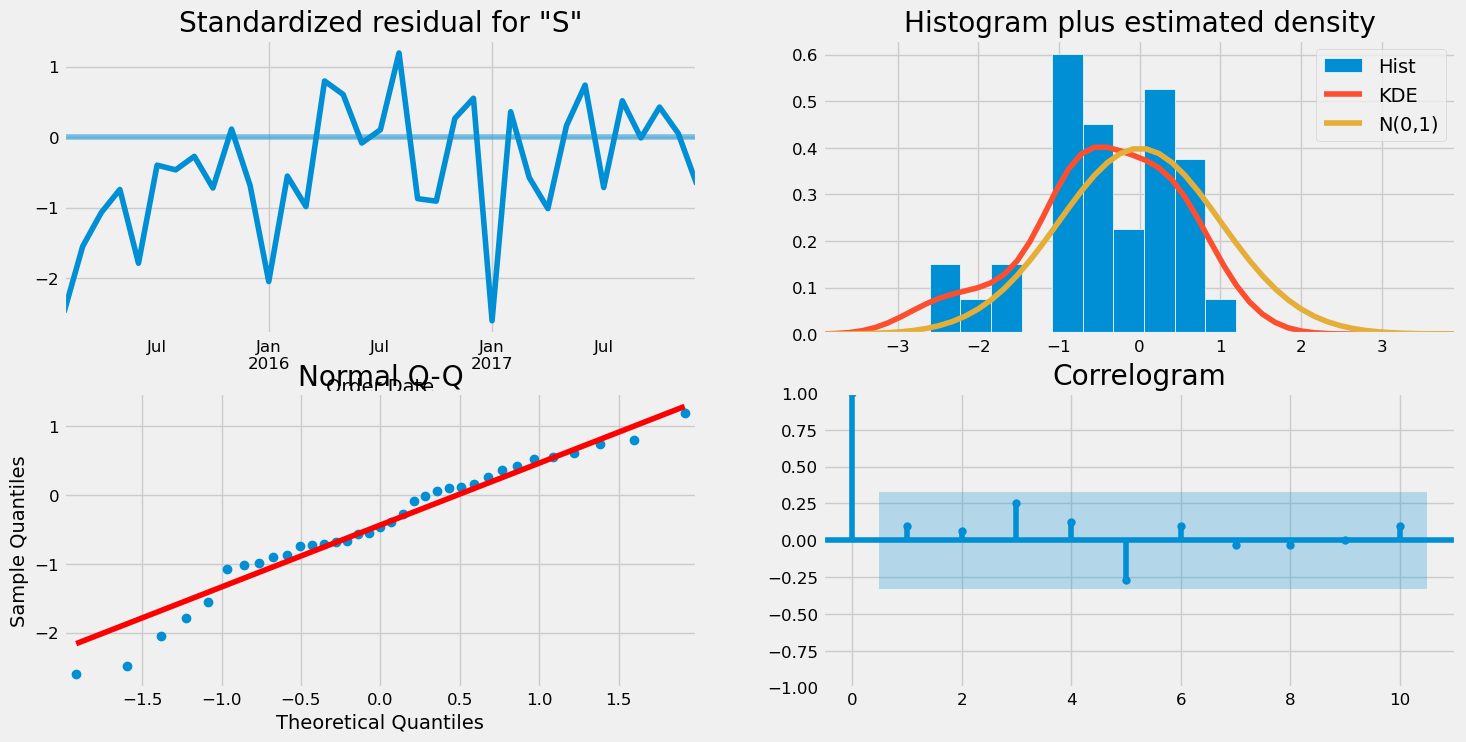

In [21]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

#### Validating Time Series Forecasting

To understand the accuracy of our time series forecasting model. I will compare predicted sales with actual sales and i will set the forecasts to start at 2017-01-01 to the end of the dataset.

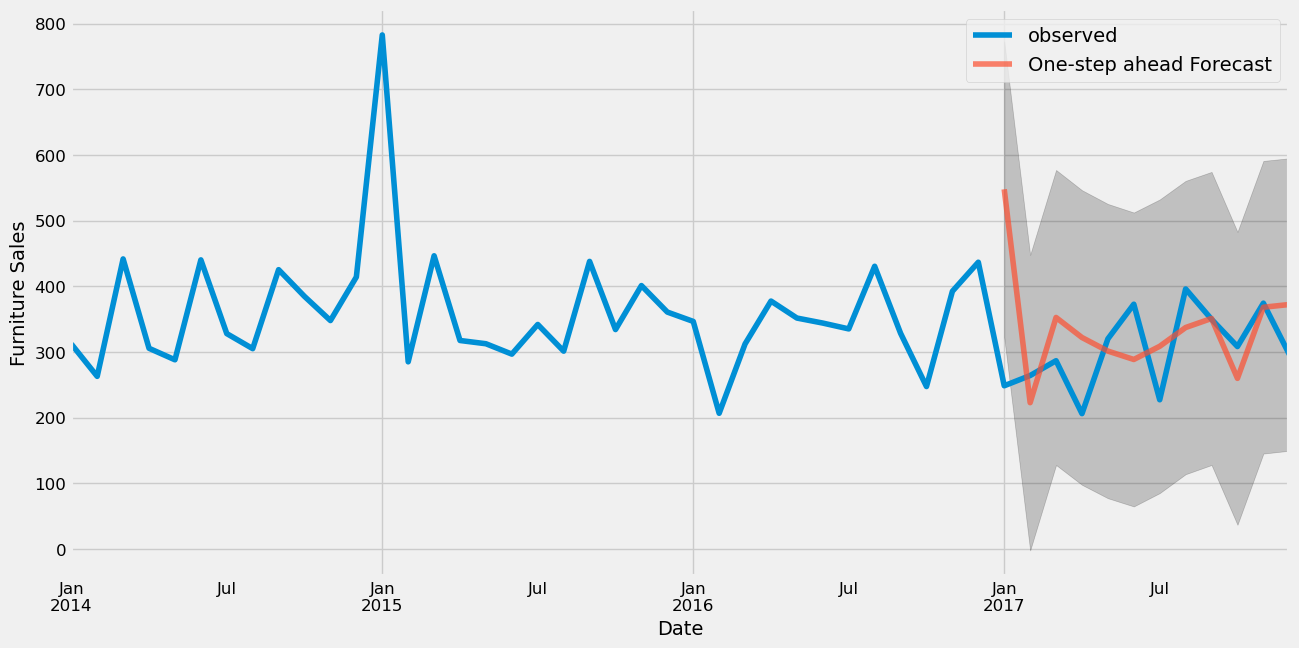

In [26]:
pred= results.get_prediction(start= pd.to_datetime("2017-01-01"), dynamic=False)
pred_ci= pred.conf_int()
ax= y["2014":].plot(label="observed")
pred.predicted_mean.plot(ax=ax, label="One-step ahead Forecast", alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:,1], color="k", alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

The above figure is showing the observed values in comparision with the forecast predictions. The picture is aligned with actual sales, really well, which is showing an upward shift in the beginning and captures the seasonality at the end of the year.

In [33]:
y_forecasted= pred.predicted_mean
y_truth= y["2017-01-01":]
y_forecasted = y_forecasted[:len(y_truth)]
mse = ((y_forecasted - y_truth) ** 2).mean()
print("The Mean Squared Error of our forecast is: {}".format(round(mse, 2)))

The Mean Squared Error of our forecast is: 11222.26


In [35]:
print("The Root Mean Squared Error of our forecasts is {}".format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 105.94


In statistics, the Mean Squared Error (MSE) of an estimator measures the average of the squares of the error that is, the common squared distinction among the anticipated values and what is estimated. The MSE is a measure of the fine of an estimator, its miles containing non-negative, and the smaller the MSE, the nearer we are to locating the road of an excellent fit.


Root Mean Square Error (RMSE) tells us that our version was capable of forecast the average daily furniture income in the test set within 105.94 of the actual income. Our furniture day by day income range from around 400 to over 1200. In my opinion, that is a pretty good version so far.

#### Producing and visualizing forecasts

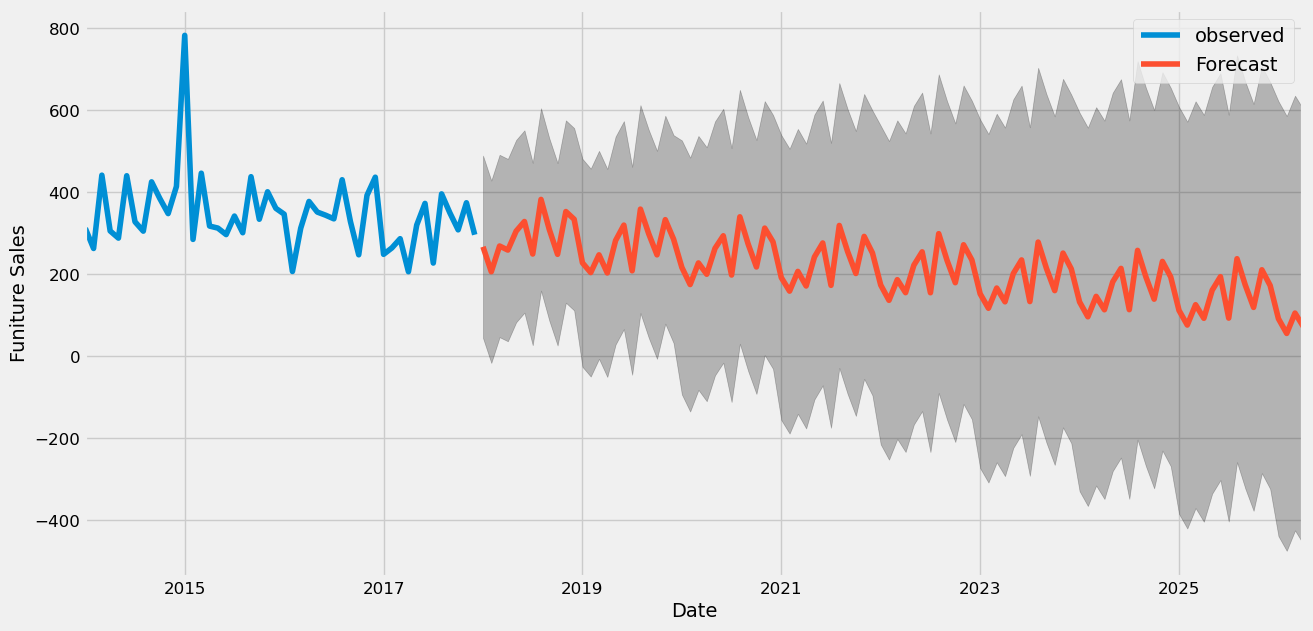

In [36]:
pred_uc= results.get_forecast(steps=100)
pred_ci= pred_uc.conf_int()
ax= y.plot(label="observed", figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label="Forecast")
ax.fill_between(pred_ci.index, 
               pred_ci.iloc[:,0],
               pred_ci.iloc[:, 1], color="k", alpha= 0.25)

ax.set_xlabel("Date")
ax.set_ylabel("Funiture Sales")
plt.legend()
plt.show()

Our Time Series Forecasting Model, without a doubt, captured furniture profits seasonality. As we forecast further out into the future, it's very natural for us to become very much less assured in our values. This gets reflected by way of the self belief intervals generated via our model, which grows more significiant as we move similarity out into the future.